## **Exploratory Data Analysis:**
(Delete some columns)

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [157]:
passenger_survived = pd.read_csv("gender_submission.csv")
passenger_survived.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [158]:
train = pd.read_csv("train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [160]:
train = train.drop(['Name'], axis=1)
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
train.shape

(891, 11)

In [162]:
duplicate_rows_train = train[train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_train.shape)

number of duplicate rows:  (0, 11)


In [163]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [164]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [165]:
train = train.drop(['Cabin', 'Age'], axis=1)
train.head(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,1,0,A/5 21171,7.2500,S
1,2,1,1,female,1,0,PC 17599,71.2833,C
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,1,0,113803,53.1000,S
4,5,0,3,male,0,0,373450,8.0500,S


In [166]:
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [167]:
train = train.dropna()
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,1,0,A/5 21171,7.2500,S
1,2,1,1,female,1,0,PC 17599,71.2833,C
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,1,0,113803,53.1000,S
4,5,0,3,male,0,0,373450,8.0500,S


In [168]:
train = train.drop(['Ticket'], axis=1)
train.head(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S


In [169]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [170]:
train = train.replace(to_replace = "male", value = 0)
train = train.replace(to_replace = "female", value = 1)
train.head(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,S
1,2,1,1,1,1,0,71.2833,C
2,3,1,3,1,0,0,7.9250,S
3,4,1,1,1,1,0,53.1000,S
4,5,0,3,0,0,0,8.0500,S


In [171]:
train = train.replace(to_replace = "S", value = 0)
train = train.replace(to_replace = "C", value = 1)
train.head(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,0
1,2,1,1,1,1,0,71.2833,1
2,3,1,3,1,0,0,7.9250,0
3,4,1,1,1,1,0,53.1000,0
4,5,0,3,0,0,0,8.0500,0


In [41]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [172]:
train = train.replace(to_replace = "Q", value = 0)

## **Building Model:**

In [173]:
#Logistic Regression

X = train.loc[:, train.columns != 'Survived']
print(X)
y = train['Survived']
print(y)

     PassengerId  Pclass  Sex  SibSp  Parch     Fare  Embarked
0              1       3    0      1      0   7.2500         0
1              2       1    1      1      0  71.2833         1
2              3       3    1      0      0   7.9250         0
3              4       1    1      1      0  53.1000         0
4              5       3    0      0      0   8.0500         0
..           ...     ...  ...    ...    ...      ...       ...
886          887       2    0      0      0  13.0000         0
887          888       1    1      0      0  30.0000         0
888          889       3    1      1      2  23.4500         0
889          890       1    0      0      0  30.0000         1
890          891       3    0      0      0   7.7500         0

[889 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [174]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [175]:
m = X.shape[0]
n = X.shape[1]-1

In [176]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad

initial_theta = np.zeros(shape=(X.shape[1]))

cost, grad = cost_function(initial_theta, X, y)

In [177]:
print(cost)
print(grad)

[[0.69314718]]
[[ 1.17547807e-01  5.30539933e+01  4.07761530e-01 -8.43644544e-02
   7.98650169e-02  1.23734533e-02 -2.38948791e+00 -1.01237345e-02]]


In [178]:
import scipy.optimize as opt
def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':10})
    return opt_results['x'], opt_results['fun']

In [179]:
opt_theta, cost = optimize_theta(X, y, initial_theta)

In [180]:
print(opt_theta)
print(cost)

[-1.27565527e-01 -7.58040100e-04 -4.37721558e-01  2.19302690e+00
 -2.04782415e-01  4.65494609e-02  7.17832781e-03  7.51536863e-02]
[[0.47241299]]


In [181]:
def predict(X, theta):
    y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
    return y_pred

In [182]:
y_pred_prob = predict(X, opt_theta)
f'Train accuracy: {np.mean(y_pred_prob == train.Survived.values) * 100}'

'Train accuracy: 79.07761529808775'

## **Data Preperation:**
(Delete some columns + delete columns SibSn and Parch)

In [183]:
passenger_survived = pd.read_csv("gender_submission.csv")
passenger_survived.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [184]:
train = pd.read_csv("train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [136]:
#First of all I'll delete some columns that I think are not important for our problem. I think that columns 'Name', 'Ticket' and 'Cabin' are not neccesary for our task:
train = train.drop('Name', axis = 1)
train = train.drop('Cabin', axis = 1)
train = train.drop('Ticket', axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [137]:
# Sex and Embarked must have few values and their values are strings so lets check this opinion and if it is true, replace them with numbers
Sex_unique = train['Sex'].unique()
print('Number of Unique Values in column Sex: ', len(Sex_unique))
print(Sex_unique)

Embarked_unique = train['Embarked'].unique()
print('Number of Unique Values in column Embarked: ', len(Embarked_unique))
print(Embarked_unique)
#Here we see that we can replace male and female with 0 and 1 but we have problem with column Embarked because it contains null values

Number of Unique Values in column Sex:  2
['male' 'female']
Number of Unique Values in column Embarked:  4
['S' 'C' 'Q' nan]


In [138]:
#Lets check how many null values are in column 'Embarked'
train.info()
#Here we see that column 'Embarked' contains only 2 missing values because we have 891 rows and column 'Embarked' containg 889 non-null values. 
#I think we can delete these two rows from data and it won't change anything because 2 rows out of 891 are really small amount

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [139]:
nan_value = float("NaN")
train.replace("", nan_value, inplace=True)
train.dropna(subset = ["Embarked"], inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [141]:
#Now we can replace male with 0 and female with 1 in column 'Sex' and 'S' with 0, 'C' with 1 and 'Q' with 2 in 'Embarked' column
train["Sex"].replace({"male": 0, "female": 1}, inplace=True)
train['Embarked'].replace({"S" : 0, "C" : 1, "Q" : 2}, inplace = True)
train.head()
#now every column contains only numbers and null values. Lets first look at correlations and then null values

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


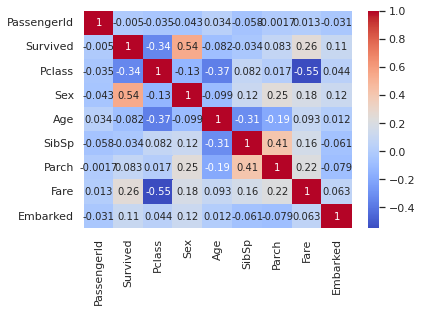

In [142]:
# I' not sure if columns 'Sex', 'SibSp', 'Parch', 'Ticket' and 'Embarked' are important, so lets see heatmaps or diagrams about these columns:
sns.heatmap(train.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
#From this heatmap I think that correlation between 'Survived' and 'Age' is really small(-0.082), also correlation between 'Survived' and 'SibSp' is small(-0.034) and between
#'Survived' and 'Parch' So I think that we can drop these columns from our data

In [155]:
del_columns = ['Age', 'SibSp', 'Parch']
train = train.drop(del_columns, axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked
0,1,0,3,0,7.2500,0
1,2,1,1,1,71.2833,1
2,3,1,3,1,7.9250,0
3,4,1,1,1,53.1000,0
4,5,0,3,0,8.0500,0


In [144]:
train.info()
#I think data is ready

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          712 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


## **Model:**

In [145]:
#Logistic Regression
X = train.loc[:, train.columns != 'Survived']
print(X)
y = train['Survived']
print(y)

     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.0      1      0   7.2500         0
1              2       1    1  38.0      1      0  71.2833         1
2              3       3    1  26.0      0      0   7.9250         0
3              4       1    1  35.0      1      0  53.1000         0
4              5       3    0  35.0      0      0   8.0500         0
..           ...     ...  ...   ...    ...    ...      ...       ...
886          887       2    0  27.0      0      0  13.0000         0
887          888       1    1  19.0      0      0  30.0000         0
888          889       3    1   NaN      1      2  23.4500         0
889          890       1    0  26.0      0      0  30.0000         1
890          891       3    0  32.0      0      0   7.7500         2

[889 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [146]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [147]:
m = X.shape[0]
n = X.shape[1]-1

In [148]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad

initial_theta = np.zeros(shape=(X.shape[1]))

cost, grad = cost_function(initial_theta, X, y)

In [149]:
print(cost)
print(grad)

[[nan]]
[[nan nan nan nan nan nan nan nan nan]]


In [150]:
import scipy.optimize as opt
def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':10})
    return opt_results['x'], opt_results['fun']

In [151]:
opt_theta, cost = optimize_theta(X, y, initial_theta)

In [152]:
print(opt_theta)
print(cost)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[nan]]


In [153]:
def predict(X, theta):
    y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
    return y_pred

In [154]:
y_pred_prob = predict(X, opt_theta)
f'Train accuracy: {np.mean(y_pred_prob == train.Survived.values) * 100}'

'Train accuracy: 46.45669291338583'

## **Data Preprocessing:**
(Fill Missing Values)

In [186]:
passenger_survived = pd.read_csv("gender_submission.csv")
passenger_survived.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [187]:
train = pd.read_csv("train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
test = pd.read_csv("test.csv")
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [189]:
#Lets check null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [192]:
percent = (train.isnull().sum()/train.isnull().count()*100)
#null values in percent:
print(percent)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [193]:
#Lets fill missing values
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

#Cabin has too much missing values so it's better to delete it:
drop_column = ['Cabin']
train.drop(drop_column, axis=1, inplace = True)

#Fill missing ages with mean of age:
train['Age'].fillna(train['Age'].median(), inplace = True)

print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [196]:
# Create new feature FamilySize as a combination of SibSp and Parch
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [197]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
train['Title'] = train['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [198]:
## create bin for age features
train['Age_bin'] = pd.cut(train['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [199]:
## create bin for fare features
train['Fare_bin'] = pd.cut(train['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare', 'Average_fare','high_fare'])

In [200]:
drop_column = ['Age','Fare','Name','Ticket']
train.drop(drop_column, axis=1, inplace = True)

In [201]:
drop_column = ['PassengerId']
train.drop(drop_column, axis=1, inplace = True)

In [202]:
traindf = pd.get_dummies(train, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

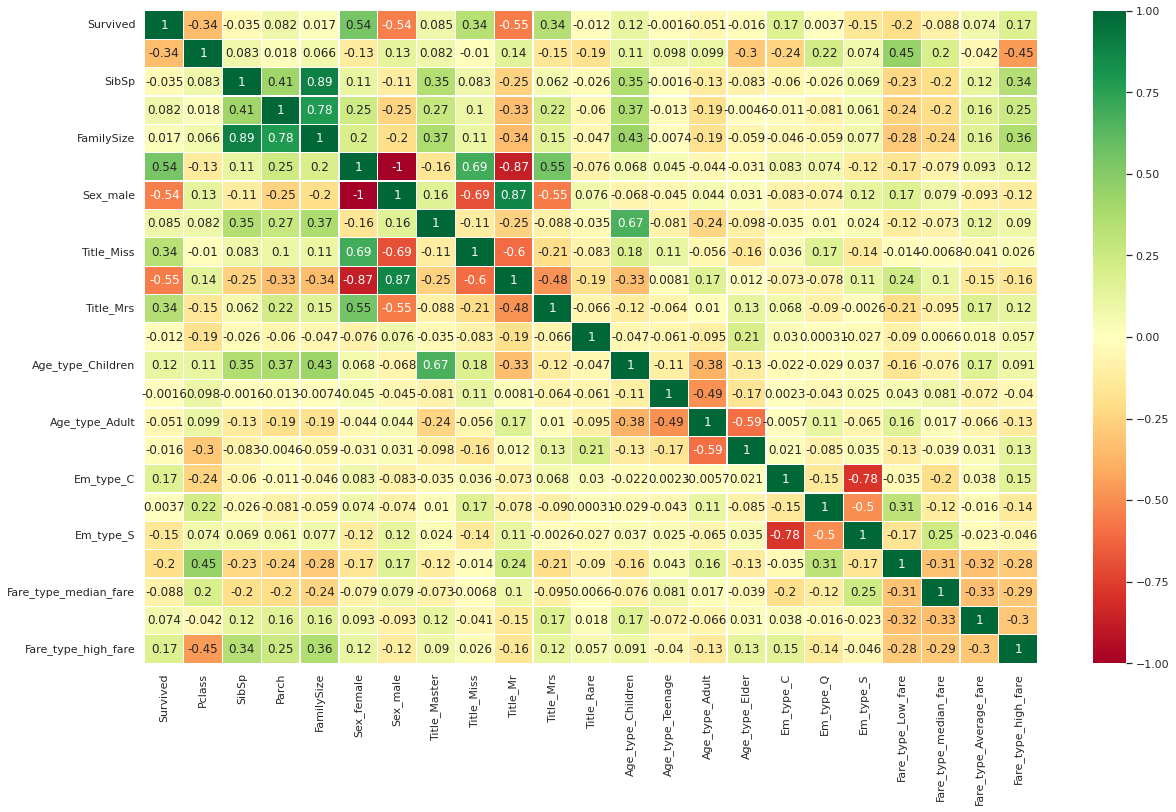

In [203]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


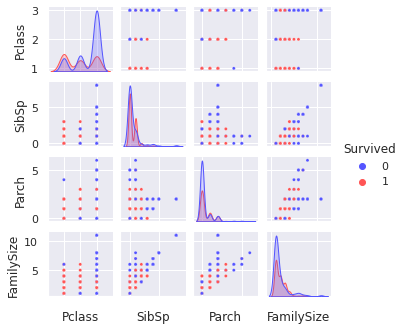

In [205]:
g = sns.pairplot(data=train, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

## **Model:**

In [208]:
#Logistic Regression
X = traindf.loc[:, traindf.columns != 'Survived']
print(X)
y = train['Survived']
print(y)

     Pclass  SibSp  ...  Fare_type_Average_fare  Fare_type_high_fare
0         3      1  ...                       0                    0
1         1      1  ...                       0                    1
2         3      0  ...                       0                    0
3         1      1  ...                       0                    1
4         3      0  ...                       0                    0
..      ...    ...  ...                     ...                  ...
886       2      0  ...                       0                    0
887       1      0  ...                       1                    0
888       3      1  ...                       1                    0
889       1      0  ...                       1                    0
890       3      0  ...                       0                    0

[891 rows x 22 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [209]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [210]:
m = X.shape[0]
n = X.shape[1]-1

def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad

initial_theta = np.zeros(shape=(X.shape[1]))

cost, grad = cost_function(initial_theta, X, y)

print(cost)
print(grad)

import scipy.optimize as opt
def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':10})
    return opt_results['x'], opt_results['fun']

opt_theta, cost = optimize_theta(X, y, initial_theta)

print(opt_theta)
print(cost)

def predict(X, theta):
    y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
    return y_pred

y_pred_prob = predict(X, opt_theta)
f'Train accuracy: {np.mean(y_pred_prob == train.Survived.values) * 100}'

[[0.69314718]]
[[ 0.11616162  0.40572391  0.07968575  0.01234568  0.20819304 -0.08529742
   0.20145903 -0.003367   -0.04208754  0.19921437 -0.04152637  0.00392817
  -0.00617284  0.01459035  0.08529742  0.02244669 -0.01010101  0.00953984
   0.11672278  0.0684624   0.04657688  0.01402918 -0.01010101]]
[ 7.69637831e-01 -6.39114585e-01 -3.93402361e-01 -3.16393650e-01
  4.88353083e-02  1.21981249e+00 -4.47744828e-01  5.68532515e-01
  4.83649631e-01 -8.94028824e-01  6.97246247e-01 -7.67925254e-02
  4.58333541e-01  1.31890228e-01  2.93865534e-01 -1.10628558e-01
  5.91492687e-01  7.19503851e-02  1.05516072e-01 -2.68398418e-01
  5.61529724e-04  2.70619749e-01  6.29493672e-01]
[[0.42922339]]


'Train accuracy: 80.69584736251403'